# Part 1: Temporal Difference (TD) Learning 

Hwajin Shin, Lucia Gonzalez Anton

Task 1.1 Recreate Figure 9.2

In [32]:
# Import necessary libraries for computations and visualisation
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from mpl_toolkits.mplot3d import Axes3D

In [33]:
def td_learning(alpha, stimuli, rewards, trials, steps):
    """
    TD learning 

    Args:
        alpha (float): Learning rate (0 <= alpha <= 1).
        stimuli (array): Input stimuli signal
        rewards (array): Reward signal
        trials (float): Number of trials
        steps (float): Number of time points
    
    Returns:
        w (array): Weights (associations between stimuli and predictions) after learning.
        v (array): Prediction of reward
        delta_v (array): Change in predictions between consecutive time steps.
        delta (2D array): Temporal Difference (TD) errors across trials and time steps.
    """

    # Initialise arrays 
    v = np.zeros(steps) # prediction
    w = np.zeros(steps)  # weights
    delta = np.zeros([trials, steps])  # TD error: 2D array for trial x time
    delta_v = np.zeros(steps)  # TD in prediction

    # Temporal difference learning: update predictions for each trial
    for n in (range(trials)): # range over number of trials
        for t in range(1, steps): # range over time point steps
            # compute the prediction v(t) as the weighted sum of past stimuli 
            # reversed slicing ensures that earlier stimuli have more influence when paired with the weights
            v[t] = (w[0:t] @ stimuli[t:0:-1])[0]

            # Compute the TD in prediction
            delta_v[t-1] = v[t] - v[t-1]

            # Compute the TD error for each time step
            delta[n, t] = rewards[t] + delta_v[t]

            # Update weights
            for tau in range(t):
                w[tau] += alpha * delta[n, t] * stimuli[t - tau]

    return w, v, delta_v, delta

In [34]:
# Define parameters to implement the TD learning function
trials = 1000
num_trials = np.arange(trials)
steps = 300
time_steps = np.arange(steps)
reward_time = 200
stimulus_time = 100
learning_rate = 0.2

# Initialise stimulus array and set it to 1 at time step 100
u = np.zeros((len(time_steps), 1)) 
u[stimulus_time] = 1

# Initialise rewards array and set it to 2 at time step 200
r = np.zeros(len(time_steps)) 
r[reward_time] = 2

# Set r as Gaussian with its integral normalised to 2
sigma = 5  # Standard deviation for Gaussian
r = gaussian_filter1d(r, sigma)

# Normalise to sum to 2
r *= 2 / np.sum(r)

# Before Learning variables
v_before = np.zeros(300)
delta_v_before = np.zeros(300)
delta_before = r

In [35]:
# Call the TD learning function
w_after, v_after, delta_v_after, delta_after = td_learning(learning_rate, u, r, trials, steps)

/var/folders/rs/csyk8bjx4zj6z782dmbhgw5w0000gn/T/ipykernel_57462/3516051509.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w[tau] += alpha * delta[n, t] * stimuli[t - tau]


Here, we generate Figure 9.2 (A). The 3D plot shows how the prediction error evolves over time within a trial and across multiple trials. The prediction error, δ(t), is the difference between the actual outcome (reward) and the predicted outcome at any given time. 

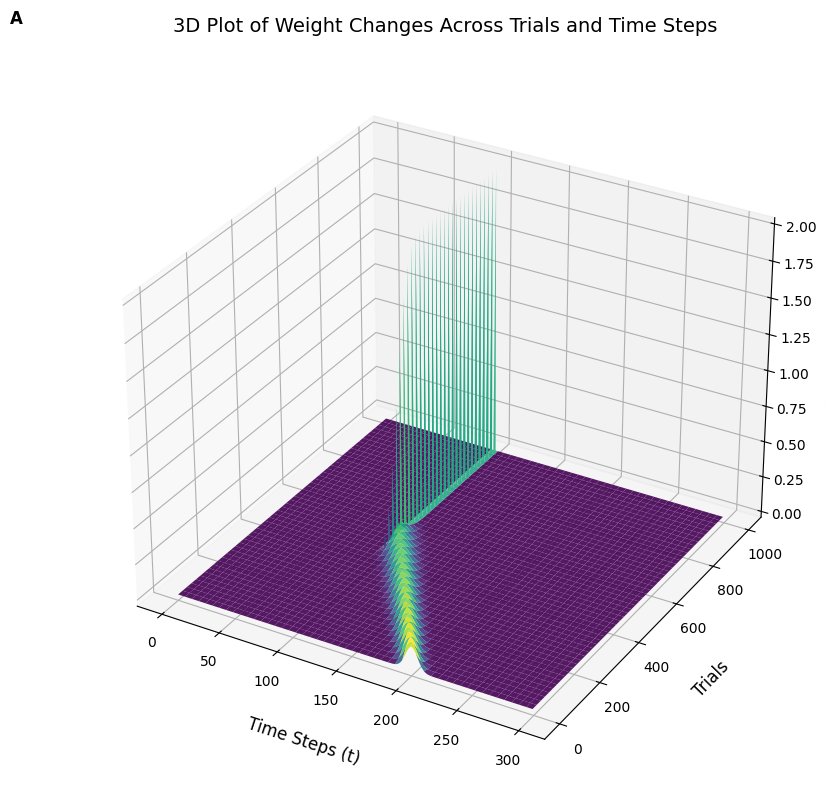

In [ ]:
# 3D PLOT (Plot 9.2 (A))

# Create mesh grid for plotting
x, y = np.meshgrid(np.arange(delta_after.shape[1]), np.arange(delta_after.shape[0]))

# Plot 3D surface with 'viridis' colormap
fig_a = plt.figure(figsize=(15, 12))
ax1 = fig_a.add_subplot(111, projection='3d')
surf = ax1.plot_surface(x, y, delta_after, cmap='viridis', edgecolor='none', alpha=0.9)

# Labels and formatting
ax1.set_xlabel('Time Steps (t)', fontsize=12, labelpad=15)
ax1.set_ylabel('Trials', fontsize=12, labelpad=15)
ax1.set_zlabel('TD Error (δ)', fontsize=12, labelpad=10)

# Title and annotation
ax1.set_title('TD Error Across Time Steps and Trials', fontsize=14, pad=20)
ax1.text2D(-0.1, 1.05, "A", transform=ax1.transAxes, fontsize=12, fontweight='bold')

# Adjust view to center the plot
ax1.view_init(elev=30, azim=-60)  # Elevation and azimuth for a centered view

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


Figure 9.2 (A) illustrates that the temporal difference error initially occurs only at the reward time (t = 200). However, as training progresses, the error shifts backward in time, eventually settling near the stimulus onset. At this point, it stabilises at a value of 2, corresponding to the total integrated reward delivered during each trial.

Here, we generate Figure 9.2 (B). Figure 9.2 (B) shows the behaviour of stimulus (u), reward (r), prediction (v), TD in prediction (Δv), and TD error (δ)before training on the left panel and the behavior after training on the right panel. 

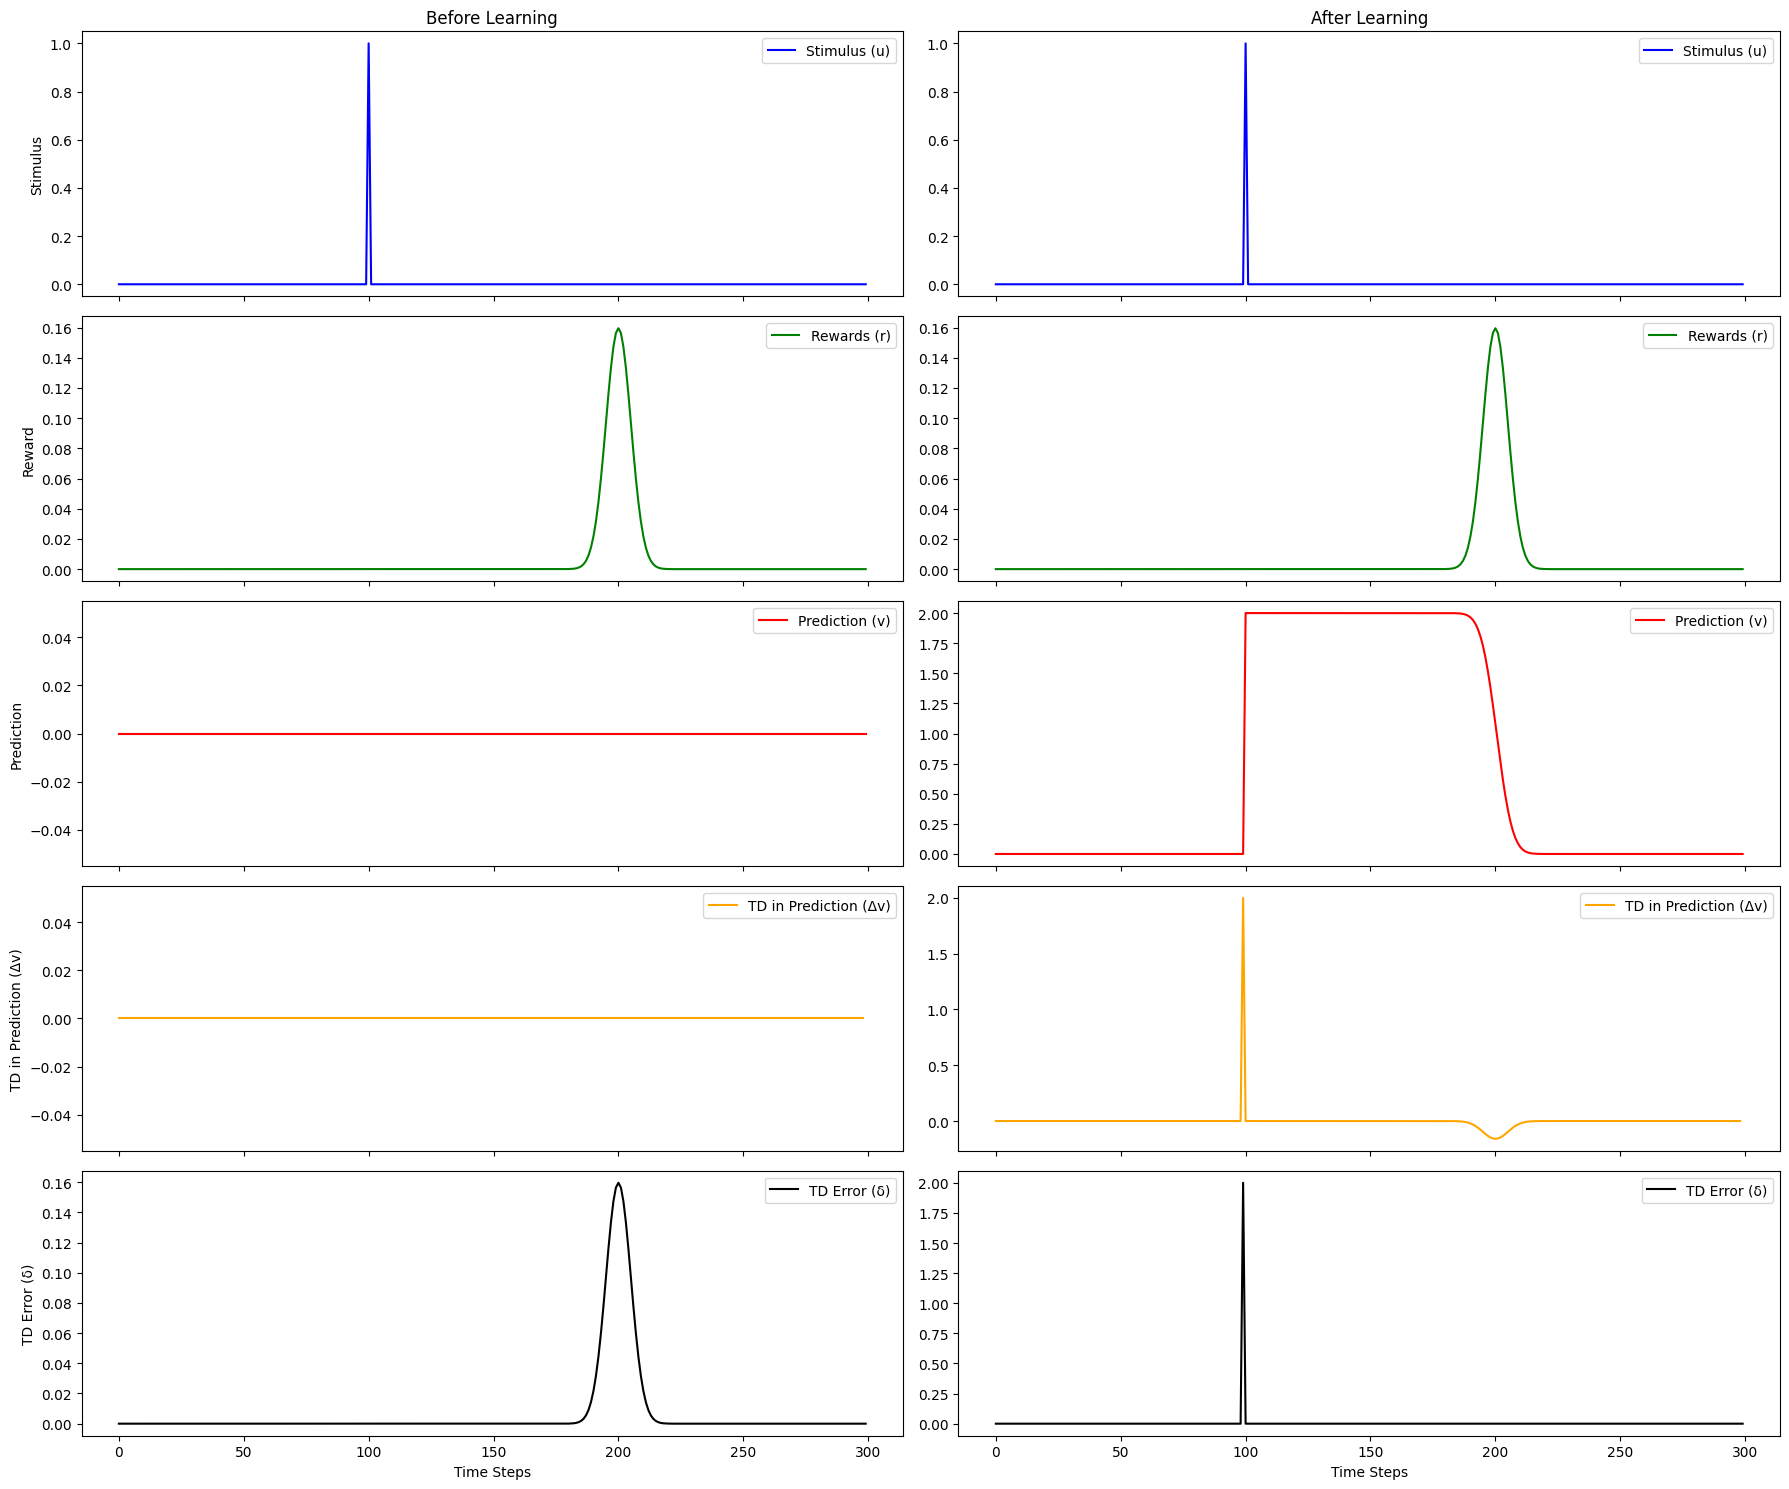

In [ ]:
# 2D PLOT (Plot 9.2 (B))

# Create subplots: 5 rows and 2 columns (left: before learning, right: after learning)
fig, axs = plt.subplots(5, 2, figsize=(18, 15), sharex='col')

time_steps = np.arange(steps)

# ---- Stimulus (u) ----
# Before learning
axs[0, 0].plot(time_steps, u, label='Stimulus (u)', color='blue')
axs[0, 0].set_title('Before Learning')
axs[0, 0].set_ylabel('Stimulus (u)')
axs[0, 0].legend()

# After learning
axs[0, 1].plot(time_steps, u, label='Stimulus (u)', color='blue')
axs[0, 1].set_title('After Learning')
axs[0, 1].legend()

# ---- Rewards (r) ----
# Before learning
axs[1, 0].plot(time_steps, r, label='Rewards (r)', color='green')
axs[1, 0].set_ylabel('Reward (r)')
axs[1, 0].legend()

# After learning
axs[1, 1].plot(time_steps, r, label='Rewards (r)', color='green')
axs[1, 1].legend()

# ---- Predictions (v) ----
# Before learning
axs[2, 0].plot(time_steps, v_before, label='Prediction (v)', color='red')
axs[2, 0].set_ylabel('Prediction (v)')
axs[2, 0].legend()

# After learning
axs[2, 1].plot(time_steps, v_after, label='Prediction (v)', color='red')
axs[2, 1].legend()

# ---- TD in Predictions (Delta v) ----
# Before learning
axs[3, 0].plot(time_steps[:-1], delta_v_before[:-1], label='TD in Prediction (Δv)', color='orange')
axs[3, 0].set_ylabel('TD in Prediction (Δv)')
axs[3, 0].legend()

# After learning
axs[3, 1].plot(time_steps[:-1], delta_v_after[:-1], label='TD in Prediction (Δv)', color='orange')
axs[3, 1].legend()

# ---- TD Error (Delta) ----
# Before learning: Plotting as a line (delta_before)
axs[4, 0].plot(time_steps, delta_before, label='TD Error (δ)', color='black')
axs[4, 0].set_ylabel('TD Error (δ)')
axs[4, 0].set_xlabel('Time Steps')
axs[4, 0].legend()

# After learning: Plotting as a line (delta_after)
axs[4, 1].plot(time_steps, delta_after[-1, :], label='TD Error (δ)', color='black')
axs[4, 1].set_xlabel('Time Steps')
axs[4, 1].legend()

# Adjust layout for readability
plt.tight_layout()
plt.show()


***Figure 9.2 (B) depicts the behaviour of several variables during a trial, both before and after learning. After training, the prediction (v) remains at 2 from the moment the stimulus is presented (t = 100) to approximately until the reward begins. 

As a result, the temporal difference prediction error (δ) shows a spike at t = 99, which persists across trials because u(t) = 0 for t < 100. Around t = 200, the temporal difference in prediction (Δv) becomes negative, precisely offsetting the reward delivery and thereby ensuring δ = 0.  

As the peak in δ shifts backwards from the time of the reward to the time of the stimulus, the weights for τ = 100, 99, 98 ... gradually increase. This adjustment extends the future reward prediction (v) from an initial transient at the time of the reward to a sustained plateau spanning from the stimulus onset to the reward. Eventually, v accurately predicts the total future reward from the stimulus time and signals the reward delivery by dropping to 0 at the point when the reward occurs.

Task 1.2: Experiment with different parameters. Plot and briefly describe your observations for each.

A. Reward Timing

/var/folders/rs/csyk8bjx4zj6z782dmbhgw5w0000gn/T/ipykernel_57462/3516051509.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w[tau] += alpha * delta[n, t] * stimuli[t - tau]


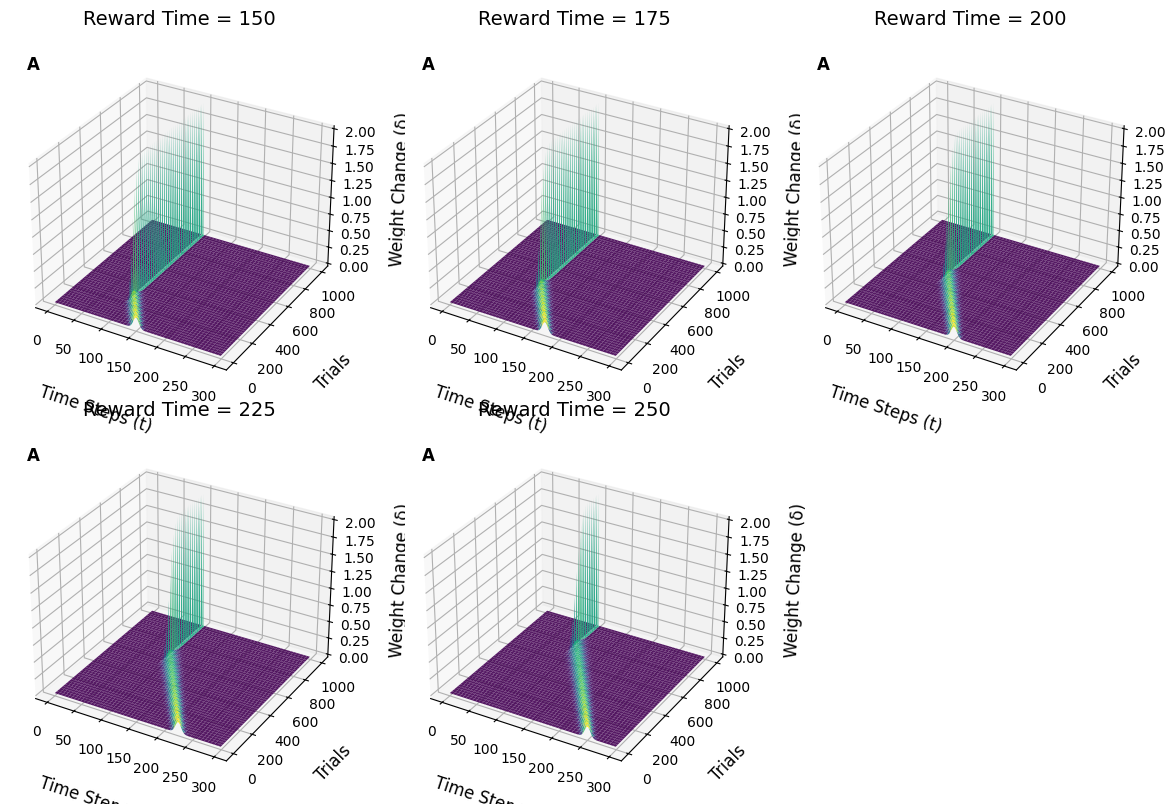

In [ ]:
# Define the array of reward times to plot
reward_times_array = [150, 175, 200, 225, 250]  # Example reward times at which reward is given

# Initialise the figure
fig_r = plt.figure(figsize=(15, 12))

# Generate a 3D plot for each reward time in reward_times_array
for idx, reward_time in enumerate(reward_times_array):
    # Initialize rewards array and set it to 2 at the current reward_time
    r = np.zeros(len(time_steps)) 
    r[reward_time] = 2  # Reward at the given time step
    
    # Apply a Gaussian filter to simulate the spread of the reward over time
    sigma = 5  # Standard deviation for Gaussian
    r = gaussian_filter1d(r, sigma)
    
    # Normalize to sum to 2
    r *= 2 / np.sum(r)

    # Run the TD learning function for the current reward time
    w, v, delta_v, delta_after = td_learning(learning_rate, u, r, trials, steps)  # Assuming td_leaning is defined
    
    # Create mesh grid for plotting based on the shape of delta_after
    x, y = np.meshgrid(np.arange(delta_after.shape[1]), np.arange(delta_after.shape[0]))

    # Create a new subplot for each reward time (using 2 rows, 3 columns)
    ax1 = fig_r.add_subplot(2, 3, idx+1, projection='3d')  # 2 rows, 3 columns

    # Labels and formatting
    surf = ax1.plot_surface(x, y, delta_after, cmap='viridis', edgecolor='none', alpha=0.9)
    ax1.set_xlabel('Time Steps (t)', fontsize=8, labelpad=15)
    ax1.set_ylabel('Trials', fontsize=8, labelpad=15)
    ax1.set_zlabel('TD Error (δ)', fontsize=8, labelpad=10)

    # Title and annotation
    ax1.set_title(f'Time of Reward: t = {reward_time}', fontsize=12, pad=20)

    # Adjust view to center the plot
    ax1.view_init(elev=30, azim=-60)  # Elevation and azimuth for a centered view

# Adjust layout for better spacing and avoid overlap
plt.tight_layout()  
plt.title('TD Error Across Time Steps and Trials')
plt.show()


Earlier Reward Times (i.e. Time of Reward: t = 150, 175):




When the reward is applied earlier in the time steps, the TD errors will 

This is because the reward has a strong influence on the weight updates early on, causing a large adjustment in weights.
The weight updates will likely have more pronounced changes right around the reward time, with a peak in the TD error corresponding to when the reward is applied.
After that, the impact of the reward diminishes as the weight updates converge.

Later Reward Times:

When the reward is applied later in the time steps, the TD errors will likely be smaller earlier in the learning process.
The weight updates will be influenced more strongly toward the end of the learning process, with a more concentrated peak in the TD error around the reward time.
The model will have had more time to adjust to the earlier stimuli, so you may observe smaller updates before the reward time and larger, more focused updates after it.

B. Learning rate

/var/folders/rs/csyk8bjx4zj6z782dmbhgw5w0000gn/T/ipykernel_57462/3516051509.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w[tau] += alpha * delta[n, t] * stimuli[t - tau]


KeyboardInterrupt: 

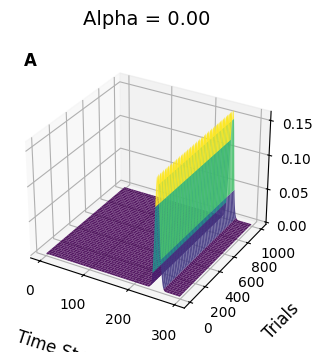

In [ ]:
# Define the array of alpha values to plot (from 0 to 1)
alpha_values = [0, 0.1, 0.2, 0.4, 1]  # Choose 5 values for alpha between 0 and 1

# Initialise the figure
fig_a = plt.figure(figsize=(15, 12))  # Adjust size for better readability

# Generate a 3D plot for each alpha value in alpha_values
for idx, alpha in enumerate(alpha_values):
    # Compute the learning results for the current alpha value
    w, v, delta_v, delta_after = td_learning(alpha, u, r, trials, steps)  # Assuming td_leaning returns delta_after
    
    # Create mesh grid for plotting based on the shape of delta_after
    x, y = np.meshgrid(np.arange(delta_after.shape[1]), np.arange(delta_after.shape[0]))
    
    # Create a new subplot for each alpha value (using 2 rows and 3 columns)
    ax1 = fig_a.add_subplot(2, 3, idx+1, projection='3d')  # 2 rows, 3 columns

    # Plot the surface
    surf = ax1.plot_surface(x, y, delta_after, cmap='viridis', edgecolor='none', alpha=0.9)

    # Labels and formatting
    ax1.set_xlabel('Time Steps (t)', fontsize=8, labelpad=15)
    ax1.set_ylabel('Trials', fontsize=8, labelpad=15)
    ax1.set_zlabel('TD Error (δ)', fontsize=8, labelpad=10)

    # Title and annotation
    ax1.set_title(f'Learning Rate (α) = {alpha:.2f}', fontsize=12, pad=20)

    # Adjust view to center the plot
    ax1.view_init(elev=30, azim=-60)  # Elevation and azimuth for a centered view

# Adjust layout for better spacing and avoid overlap
plt.tight_layout() 
plt.title('TD Error Across Time Steps and Trials')
plt.show()


When there is no learning (i.e. α = 0), the model cannot learn to predict the reward from the stimuli, and thus, the TD error remains stable across trials. For smaller values (i.e. α = 0.1) of the learning rate smaller weight updates will be seen, and thus, a more gradual learning (in comparison to the learning observed in α = 0.2). On the other hand, larger values of the learning rate (i.e. α = 0.4) will lead to larger weight update and a more steep learning (in comparison to the learning observed in α = 0.2). However, extremely large learning rates (i.e. α = 1) can lead to instability, causing the learning process to overshoot or oscillate, leading to erratic weight changes. This can make the learning unstable, often leading to large and inconsistent TD errors.

C. Multiple rewards

In [40]:
# Define reward scenarios with 1 to 5 rewards per trial
reward_scenarios = [
    [200],                      # Single reward
    [175, 200],                 # Two rewards
    [175, 200, 225],            # Three rewards
    [150, 175, 200, 225],       # Four rewards
    [150, 175, 200, 225, 250]   # Five rewards
]

# Initialise the figure 
fig_r = plt.figure(figsize=(15, 12))

# Generate a 3D plot for varying number of rewards represented in reward_scenarios
for idx, reward_times in enumerate(reward_scenarios):
    # Initialize rewards array
    r = np.zeros(len(time_steps))
    
    # Add Gaussian rewards for each reward time
    for reward_time in reward_times:
        single_r = np.zeros(len(time_steps))
        single_r[reward_time] = 1
        single_r = gaussian_filter1d(single_r, sigma)
        
        # Normalize single_r to have an integral of 2
        single_r *= 2 / np.sum(single_r)
        
        r += single_r  # Add the Gaussian reward
    
    # Run the TD learning function 
    w, v, delta_v, delta_after = td_learning(learning_rate, u, r, trials, steps)  
    
    # Create mesh grid for plotting based on delta_after dimensions
    x, y = np.meshgrid(np.arange(delta_after.shape[1]), np.arange(delta_after.shape[0]))

    # Add a 3D subplot for the current reward scenario
    ax1 = fig_r.add_subplot(2, 3, idx+1, projection='3d')  # Adjust to fit all plots

    # Plot the surface
    surf = ax1.plot_surface(x, y, delta_after, cmap='viridis', edgecolor='none', alpha=0.9)

    # Customise labels and appearance
    ax1.set_xlabel('Time Steps (t)', fontsize=8, labelpad=15)
    ax1.set_ylabel('Trials', fontsize=8, labelpad=15)
    ax1.set_zlabel('TD Error (δ)', fontsize=8, labelpad=10)
    ax1.set_title(f'Rewards at: t = {reward_times}', fontsize=12, pad=10)
    ax1.view_init(elev=30, azim=-60)  # Adjust view angle

# Adjust layout to prevent overlap
plt.tight_layout()
plt.title('TD Error Across Time Steps and Trials')
plt.show()

/var/folders/rs/csyk8bjx4zj6z782dmbhgw5w0000gn/T/ipykernel_57462/3516051509.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w[tau] += alpha * delta[n, t] * stimuli[t - tau]


KeyboardInterrupt: 

<Figure size 1500x1200 with 0 Axes>

Here, we introduce five different reward configurations, with 1 to 5 rewards spaced at specific time steps within each trial. We can observe small peak(s) corresponding to the each reward and reward times, which eventually integrates around the stimulus time (t = 100) with learning. 

D. Stochastic rewards

D.1 Stochasticity in Reward Timing

/var/folders/rs/csyk8bjx4zj6z782dmbhgw5w0000gn/T/ipykernel_57462/315618034.py:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w[tau] += alpha * delta[n, t] * stimuli[t - tau]


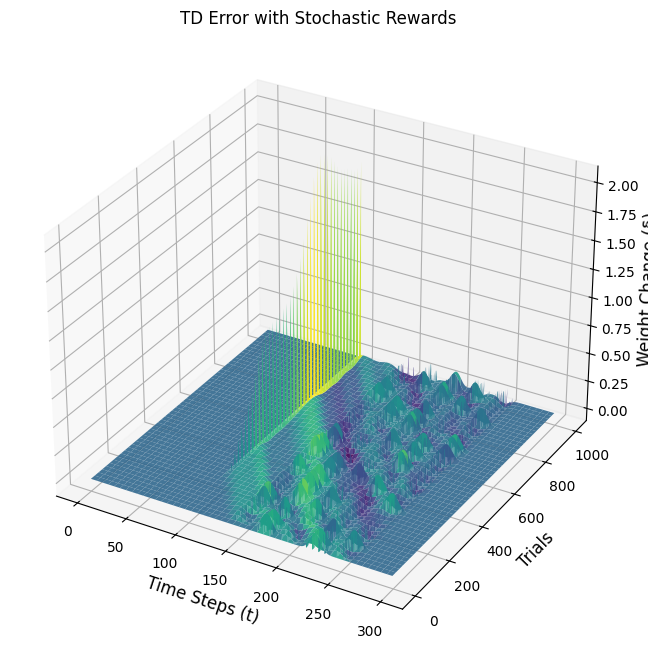

In [ ]:
# Define parameters for stochastic reward times
reward_times_array = [150, 175, 200, 225, 250]  # Possible reward times

# Generate trial-specific rewards
rewards = np.zeros((trials, steps))  # Initialize 2D array for trial x time step

# Assign a stochastic reward time for each trial
np.random.seed(42)  # For reproducibility
stochastic_reward_times = np.random.choice(reward_times_array, size=trials)

# Create the reward signals
for n in range(trials):
    reward_time = stochastic_reward_times[n]
    r = np.zeros(steps)
    r[reward_time] = 1  # Reward at the stochastic time step
    r = gaussian_filter1d(r, sigma)  # Apply Gaussian filter
    r *= 2 / np.sum(r)  # Normalize to sum to 2
    rewards[n, :] = r  # Assign to the trial-specific rewards array

# Update td_learning to td_learning_stochastic to accept r as a 2D array

def td_leaning_stochastic(alpha, stimuli, rewards, trials, steps):
    """
    TD learning for stochastic reward

    Args:
        alpha (float): Learning rate (0 <= alpha <= 1).
        stimuli (array): Input stimuli signal
        rewards (2D array): Reward signals (trials x time steps)
        trials (int): Number of trials
        steps (int): Number of time points
    
    Returns:
        w (array): Weights (associations between stimuli and predictions) after learning.
        v (array): Prediction of reward
        delta_v (array): Change in predictions between consecutive time steps.
        delta (2D array): Temporal Difference (TD) errors across trials and time steps.
    """
    # Initialise arrays
    w = np.zeros(steps)  # Weights
    v = np.zeros(steps)  # Prediction
    delta = np.zeros((trials, steps))  # TD errors (trials x time steps)
    delta_v = np.zeros(steps)  # TD in predictions

    # TD learning: update predictions for each trial
    for n in range(trials):  # Iterate over trials
        for t in range(1, steps):  # Iterate over time steps
            # Compute prediction v(t) as the weighted sum of past stimuli
            v[t] = (w[0:t] @ stimuli[t:0:-1])[0]

            # Compute TD in predictions
            delta_v[t - 1] = v[t] - v[t - 1]

            # Compute TD error for this trial and time step
            delta[n, t] = rewards[n, t] + delta_v[t]

            # Update weights
            for tau in range(t):
                w[tau] += alpha * delta[n, t] * stimuli[t - tau]

    return w, v, delta_v, delta


# Run TD learning with stochastic rewards
w, v, delta_v, delta_after = td_leaning_stochastic(learning_rate, u, rewards, trials, steps)

# Plot as before
fig = plt.figure(figsize=(15, 12))
x, y = np.meshgrid(np.arange(delta_after.shape[1]), np.arange(delta_after.shape[0]))

# Plot the surface
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, delta_after, cmap='viridis', edgecolor='none', alpha=0.9)

# Format plot
ax.set_xlabel('Time Steps (t)', fontsize=12)
ax.set_ylabel('Trials', fontsize=12)
ax.set_zlabel('TD Error (δ)', fontsize=12)
plt.title('TD Error Across Timestep and Trials with Stochastic Rewards')
plt.suptitle('Stochasticity in Reward Timing')
plt.show()


Here, we have introduced stochasticity in reward timing (t = 150, 175, 200, 225, or 250). The plot shows a rather delayed learning and a weaker association in comparison to the plot with a single reward timing (t = 200), but achieves a stabilisation at the time of stimuli (t = 100). 

D.2 Stochasticity in Absence and Presence of Reward

/var/folders/rs/csyk8bjx4zj6z782dmbhgw5w0000gn/T/ipykernel_57462/315618034.py:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w[tau] += alpha * delta[n, t] * stimuli[t - tau]


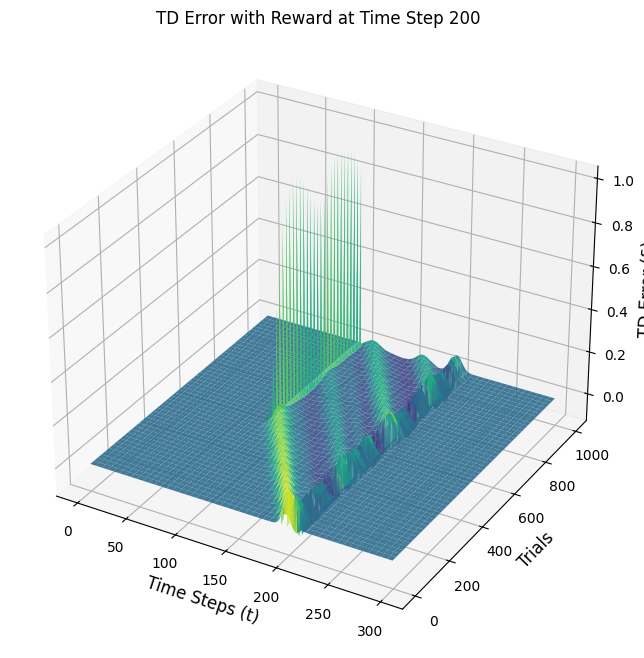

In [ ]:
# Define parameters
reward_probability = 0.5  # Probability of giving a reward at time step 200

# Generate trial-specific rewards
rewards = np.zeros((trials, steps))  # Initialize 2D array for trial x time step

# Create the reward signals with conditional reward at time 200
np.random.seed(42)  # For reproducibility
for n in range(trials):
    r = np.zeros(steps)
    
    # Randomly decide whether to give a reward at time 200
    if np.random.rand() < reward_probability:
        r[200] = 1  # Reward at fixed time step 200

    # Apply Gaussian filter to spread the reward signal
    r = gaussian_filter1d(r, sigma)
    r_sum = np.sum(r)
    if r_sum != 0:
        r *= 2 / r_sum  # Normalize to sum to 2
    else:
        r = np.zeros_like(r)  # or handle this case differently


    rewards[n, :] = r  # Assign to the trial-specific rewards array

# Update the TD learning function to work with these new rewards
w, v, delta_v, delta_after = td_leaning_stochastic(learning_rate, u, rewards, trials, steps)

# Plot as before
fig = plt.figure(figsize=(15, 12))
x, y = np.meshgrid(np.arange(delta_after.shape[1]), np.arange(delta_after.shape[0]))

# Plot the surface
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, delta_after, cmap='viridis', edgecolor='none', alpha=0.9)

# Format plot
ax.set_xlabel('Time Steps (t)', fontsize=12)
ax.set_ylabel('Trials', fontsize=12)
ax.set_zlabel('TD Error (δ)', fontsize=12)
plt.title('TD Error Across Timesteps and Trials with Stochastic Rewards')
plt.suptitle('Stochasticity in Absence or Presence of Rewards')
plt.show()


Here, we introduce a stochasticity with the reward probability (0.5). The plot shows a rather delayed learning and a weaker association in comparison to the plot with a single reward timing (t = 200), but achieves a stabilisation at the time of stimuli (t = 100). 